# THIS IS A DEMO ON HOW TO INPUT MISSING VALUES IN MACHINE LEARINING

In [1]:
# importing necessary liberaries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
# creating data
data = {
    'one': pd.Series([1, 2, 5], index=['a', 'b', 'e']),
    'two': pd.Series([1,2,3,4,], index=['a', 'b', 'c', 'd'])
}

table = pd.DataFrame(data)
print(table)

   one  two
a  1.0  1.0
b  2.0  2.0
c  NaN  3.0
d  NaN  4.0
e  5.0  NaN


In [3]:
# filling missing values with sklearn imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(table)
imputed_data = imputer.transform(table.values)
table_2 = pd.DataFrame(imputed_data, columns=['one', 'two'])
table_2

C:\Users\USER\.conda\envs\data-speaks\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,one,two
0,1.000000,1.0
1,2.000000,2.0
2,2.666667,3.0
3,2.666667,4.0
4,5.000000,2.5


## HANDLING CATEGORICAL VALUES

Categorical values are often represented as a column of string. But most of the machine learning liberaries require the input to be in numerical values.
We can handle these categorical values using 3 methods:
- get_dummies()
- LabelEncoder()
- OneHotEncoder()

In [4]:
data = {'Cutomer_id': [1,2,3,4,5],
       'Loan_type': ['Home Loan',
                     'Personal Loan',
                     'Education Loan',
                    'Home Loan',
                    'Credit Loan'],
       'Income': ['30k', '25k', '15k', '40k', '35k']}

loan_info = pd.DataFrame(data)
loan_info

,Cutomer_id,Loan_type,Income
0,1,Home Loan,30k
1,2,Personal Loan,25k
2,3,Education Loan,15k
3,4,Home Loan,40k
4,5,Credit Loan,35k


Handling the Categorical Values: get_dumies()


get_dummies() is a pandas dataframe method and can be directly applied to a dataframe

In [6]:
loan_info_2 = pd.get_dummies(loan_info, prefix_sep='_', drop_first=True)
loan_info_2.apply(lambda x: x*1)


,Cutomer_id,Loan_type_Education Loan,Loan_type_Home Loan,Loan_type_Personal Loan,Income_25k,Income_30k,Income_35k,Income_40k
0,1,0,1,0,0,1,0,0
1,2,0,0,1,1,0,0,0
2,3,1,0,0,0,0,0,0
3,4,0,1,0,0,0,0,1
4,5,0,0,0,0,0,1,0


Handling the Categorical Values: LabelEncoder()

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
loan_info_update = loan_info.apply(label_encoder.fit_transform)
loan_info_update

,Cutomer_id,Loan_type,Income
0,0,2,2
1,1,3,1
2,2,1,0
3,3,2,4
4,4,0,3


Handling the Categorical Values: OneHotEncoder()

In [14]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
x = one_hot.fit_transform(loan_info).toarray()
x = pd.DataFrame(x)
x.columns = one_hot.get_feature_names_out()
len(x.columns.values)

14

In [16]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(drop='first')
y = one_hot.fit_transform(loan_info).toarray()
y = pd.DataFrame(y)
y.columns = one_hot.get_feature_names_out()
len(y.columns.values)

11

# this is from youtube

This part of the code shows the work flow of scikit learn

we are going to be using the iris dataset provided by sklearn 

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.impute import SimpleImputer

In [18]:
# loading the data
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
# visualizing X and y separately
load_iris(return_X_y=True)

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [20]:
# storing the data into X and y variable
X, y = load_iris(return_X_y=True)

In [21]:
X.shape

(150, 4)

In [22]:
y.shape

(150,)

In [23]:
# training a linear_regression model with the dataset that we have
# here our model has not been trained, we have only created it
model = LinearRegression()

In [24]:
# fitting the data to the model for trainning
model.fit(X,y)

LinearRegression()

In [25]:
#  although we did not split our data into train and test data
# but if we decide to predict some output we can do the following
model.predict(X)

array([-8.25493616e-02, -4.01284476e-02, -4.86276768e-02,  1.22998627e-02,
       -7.53667248e-02,  5.82910066e-02,  3.83367194e-02, -4.44863248e-02,
        1.98324281e-02, -8.21970989e-02, -1.01272512e-01,  7.59348686e-04,
       -8.98630676e-02, -1.02503649e-01, -2.26652208e-01, -4.10494982e-02,
       -3.31670043e-02, -2.16241562e-02, -3.21980063e-02, -1.07834994e-02,
       -4.35196609e-02,  5.41496547e-02, -1.22062394e-01,  1.76835660e-01,
        6.93528569e-02, -5.59002750e-03,  1.00228589e-01, -7.08754443e-02,
       -8.97319983e-02,  1.99658314e-02,  1.27831946e-02,  3.26017444e-02,
       -1.55848342e-01, -1.55367344e-01, -2.12718935e-02, -1.05063936e-01,
       -1.50176206e-01, -1.25101345e-01, -7.04002332e-03, -5.56769102e-02,
       -3.32980735e-02,  7.07502372e-02, -1.50559206e-02,  2.18071051e-01,
        1.41599717e-01,  3.19873432e-02, -4.88442021e-02, -1.45725887e-02,
       -9.00819270e-02, -6.33428789e-02,  1.20248442e+00,  1.28482413e+00,
        1.32433716e+00,  

In [26]:
# let's call another model K-nearest Nieghbor
k_model = KNeighborsRegressor()

In [27]:
# training the model
k_model.fit(X, y)

KNeighborsRegressor()

In [28]:
# to predict after training the model 
k_model.predict(X)

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1.2, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1.2, 1. , 1.6, 1. , 1.6, 1. , 1. , 1. , 1. , 1.4,
       1. , 1. , 1. , 1. , 1. , 1.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 2. , 2. , 2. , 2. ,
       2. , 2. , 1.2, 2. , 2. , 2. , 1.8, 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 1.4, 2. , 2. , 2. , 1.8, 2. , 2. , 2. , 1.8, 2. , 2. ,
       2. , 2. , 2. , 1.6, 1.8, 2. , 2. , 2. , 1.8, 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 1.8, 2. , 2. , 2. ])

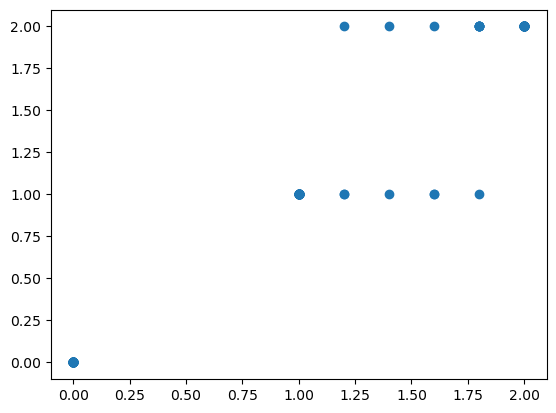

In [29]:
# let us visualize the data
# we are going to use scatter plot here
# we are going to put predicted values on x axis and given values on y axis
# see how we have predicted well with our model
predicted_data = k_model.predict(X)
plt.scatter(predicted_data, y)
plt.show()

## Data Cleaning and Preprocessing

In [35]:
# getting a dataset
from sklearn.datasets import fetch_openml

In [36]:
df = fetch_openml('titanic', version=1,as_frame=True)['data']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


In [38]:
# finding out null values
df.isna().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [39]:
# how important are this null values?
# is it necessary to ignore or remove them?
# we will be ansering these question with visualization using seaborn liberary
# we will calcualte the percentage of null values for each features
# we will divide the number of null values for each feature by the total number of rows in the entire dataset
sns.set()
missing_value_percent = pd.DataFrame((df.isna().sum() / len(df)) * 100 )
missing_value_percent
df2 = pd.DataFrame(df.isna().sum())
pd.concat([missing_value_percent, df2], axis=1)


,0,0
pclass,0.000000,0
name,0.000000,0
sex,0.000000,0
age,20.091673,263
sibsp,0.000000,0
parch,0.000000,0
ticket,0.000000,0
fare,0.076394,1
cabin,77.463713,1014
embarked,0.152788,2


<Axes: title={'center': 'Missing value in Percentage'}, ylabel='percentage'>

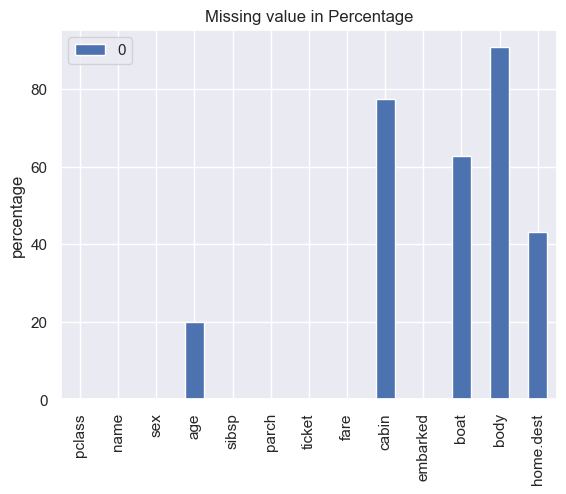

In [40]:
missing_value_percent.plot(kind='bar', title='Missing value in Percentage',
                          ylabel='percentage')

 we do have multipler columns with missing values. We either fill the missing values or drop the entire column  with the missing values

In [41]:
# as we can see, the 'body' column has the most missing values
# we will drop this column as it is not usefull for our machine learning operation
print(f'size of dataset is: {df.shape}')

size of dataset is: (1309, 13)


In [42]:
# dropping the column we do not need 
df.drop('body', axis=1, inplace=True)

In [43]:
print(f'shape of dataset after dropping column: {df.shape}')

shape of dataset after dropping column: (1309, 12)


In [44]:
# removing columns might not necessary be the best option
# this we will do with other columns with missing values
# sklearn provides codes to fill missing values base on statistics 
# and other measures such as k-nearest neighbors
# let's use sklearn simple imputer
# from the table and graph that we have presented, we will see that the age column
# has the lowst number of null values.
# let's use SimpleImputer function from sklearn to fill the missing values

mean_imp = SimpleImputer(strategy='mean')
df['age'] = mean_imp.fit_transform(df[['age']])

In [45]:
print(f'number of null values after imputation is: {df.age.isnull().sum()}')

number of null values after imputation is: 0


In [46]:
df.isnull().sum()

pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
home.dest     564
dtype: int64

In [47]:
df.dtypes

pclass          int64
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
home.dest      object
dtype: object

In [48]:
df = fetch_openml('titanic', version=1,as_frame=True)['data']
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [49]:
df = df.drop('body', axis=1)
df.columns


Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'home.dest'],
      dtype='object')

In [51]:
# we are going to use the sklearn SimpleImputer to fill the null values
# since we know that the rest of the columns with null values are of string type
# we can just specify strategy as most_frequent in  the simple imputer

for column in df.columns[df.isnull().any()]:
    if df[column].dtype == 'float64':
        missing_value = np.nan
        strategy = 'mean'
        print(f'processing non object type columns........')
        print(f'strategy = {strategy}, and missing_value = {missing_value}')
        print(f'column name: {column}')
        imput = SimpleImputer(strategy=strategy, missing_values=missing_value)
        df[column] = imput.fit_transform(df[[column]])

for column in df.columns[df.isnull().any()]:
    df[column] = df[column].replace({None: np.nan})
missing_value = np.nan
strategy = 'most_frequent'
print(f'processing object type columns.....')
print(f'strategy = {strategy}, and missing_value = {missing_value}')
imput = SimpleImputer(missing_values=missing_value, strategy=strategy)
processed_df = imput.fit_transform(df)
new_df = pd.DataFrame(processed_df, columns=df.columns)
new_df

processing object type columns.....
strategy = most_frequent, and missing_value = nan


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,C23 C25 C27,C,13,"New York, NY"
1305,3,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C23 C25 C27,C,13,"New York, NY"
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,C23 C25 C27,C,13,"New York, NY"
1307,3,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,C23 C25 C27,C,13,"New York, NY"


In [52]:
# we are able to fix the issue of null values
new_df.isnull().any()

pclass       False
name         False
sex          False
age          False
sibsp        False
parch        False
ticket       False
fare         False
cabin        False
embarked     False
boat         False
home.dest    False
dtype: bool

## Feature Engineering


Features are the input variable given to a machine learning models to predict the desired output

feature engineering involves removing some columns which are not best for the machine learning models or adding extra column to the features that helps improve the learning process of the model

In [53]:
# let's take a look at the column 'sibsp' and 'parch' in our dataset
# the sibsp  column indicate the number of siblings traveling with the passenger
# the parch column indicate the number of parent and children traveling with the passenger
new_df[['sibsp', 'parch']].head()

,sibsp,parch
0,0,0
1,1,2
2,1,2
3,1,2
4,1,2


In addition feature engineering also involve turning observation into features
we can create a separate column to indicate if the traveller is with siblings or parents using the two columns mentioned above

In [54]:
new_df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'home.dest'],
      dtype='object')

In [55]:
# we are going to create an extra column indication wether the 
# passenger traveled alone or not 
new_df['travelled_alone'] = new_df['sibsp'] + new_df['parch']
new_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,"St Louis, MO",0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",3
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",3
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",3
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",3


In [56]:
# we are going to replace values greater than 0 with 1 to indicate that the passenger travlled alone
# 
new_df.loc[new_df['travelled_alone'] > 0, 'travelled_alone'] = 1
new_df.loc[new_df['travelled_alone'] == 0, 'travelled_alone'] = 0

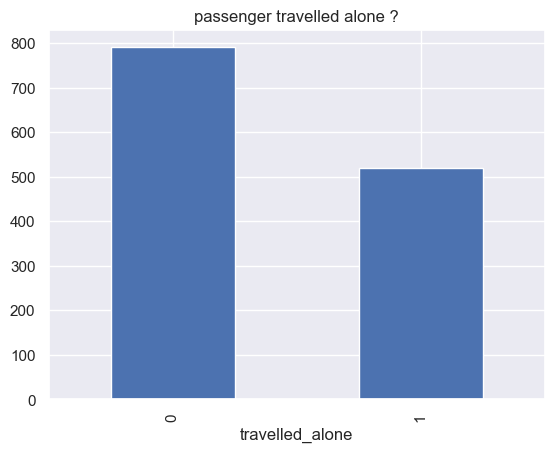

In [57]:
new_df['travelled_alone'].value_counts().plot(title='passenger travelled alone ?', kind='bar')
plt.show()

Next we are going to convert categorical data into numeric data. This is what the machine model can process 
In this case the column we are interested in is the sex column which contains 'male' and 'female'

In [58]:
# we are going to use OneHotEnccoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder = LabelEncoder()
new_df['sex_encoded'] = encoder.fit_transform(new_df[['sex']])



C:\Users\USER\.conda\envs\data-speaks\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
new_df[['sex', 'sex_encoded']]

,sex,sex_encoded
0,female,0
1,male,1
2,female,0
3,male,1
4,female,0
...,...,...
1304,female,0
1305,female,0
1306,male,1
1307,male,1


In [70]:
# let's use OneHotEncoder this time
new_df.drop('sex_encoded', axis=1, inplace=True)
new_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,travelled_alone
0,0.0,"Allen, Miss. Elisabeth Walton",0.0,0.361169,0.000,0.000000,24160,0.412503,B5,S,2,"St Louis, MO",0.0
1,0.0,"Allison, Master. Hudson Trevor",1.0,0.009395,0.125,0.222222,113781,0.295806,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",1.0
2,0.0,"Allison, Miss. Helen Loraine",0.0,0.022964,0.125,0.222222,113781,0.295806,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",1.0
3,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,0.373695,0.125,0.222222,113781,0.295806,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",1.0
4,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,0.311064,0.125,0.222222,113781,0.295806,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",1.0


In [61]:
encode = OneHotEncoder()
new_df['sex'] = encode.fit_transform(new_df[['sex']]).toarray()[:, 1]
new_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,travelled_alone,sex_encoded
0,1,"Allen, Miss. Elisabeth Walton",0.0,29.0,0,0,24160,211.3375,B5,S,2,"St Louis, MO",0,0
1,1,"Allison, Master. Hudson Trevor",1.0,0.9167,1,2,113781,151.55,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",1,1
2,1,"Allison, Miss. Helen Loraine",0.0,2.0,1,2,113781,151.55,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",1,0
3,1,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0,1,2,113781,151.55,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",1,1
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0,1,2,113781,151.55,C22 C26,S,13,"Montreal, PQ / Chesterville, ON",1,0


## Data Scaling

If data in any condition has data points far from each other, scaling is a technique to make them closer to each other.

There are two ways we can scale data
1. StandardScalar: It follows the Standard Normal Disttribution, i.e., it assumes a normal distribution for data within each feature. A mean of zero and standard deviation of 1
2. MinMaxScaler: For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range.

In [62]:
from sklearn.preprocessing import StandardScaler


In [63]:
# convreting necessary column datatype
new_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'travelled_alone']] = new_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'travelled_alone']].apply(pd.to_numeric)

In [64]:
new_df.dtypes

pclass               int64
name                object
sex                float64
age                float64
sibsp                int64
parch                int64
ticket              object
fare               float64
cabin               object
embarked            object
boat                object
home.dest           object
travelled_alone      int64
sex_encoded          int32
dtype: object

In [65]:
# checking the columns which are numerical
numerical_columns = new_df.select_dtypes(include=['int64', 'float64', 'int32']).columns
numerical_columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'travelled_alone',
       'sex_encoded'],
      dtype='object')

In [66]:
# now let us use our standard scaler on the numrical columns
ss = StandardScaler()

In [67]:
new_df[numerical_columns] = ss.fit_transform(new_df[numerical_columns])
new_df.describe()

,pclass,sex,age,sibsp,parch,fare,travelled_alone,sex_encoded
count,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03
mean,-1.737003e-16,9.770641e-17,1.519878e-16,-8.142201e-18,1.628440e-17,4.342507e-17,-6.513761e-17,9.770641e-17
std,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.000382e+00
min,-1.546098e+00,-1.344995e+00,-2.307330e+00,-4.790868e-01,-4.449995e-01,-6.437751e-01,-8.105319e-01,-1.344995e+00
25%,-3.520907e-01,-1.344995e+00,-6.119712e-01,-4.790868e-01,-4.449995e-01,-4.911082e-01,-8.105319e-01,-1.344995e+00
50%,8.419164e-01,7.434969e-01,2.758687e-16,-4.790868e-01,-4.449995e-01,-3.643001e-01,-8.105319e-01,7.434969e-01
75%,8.419164e-01,7.434969e-01,3.974806e-01,4.812878e-01,-4.449995e-01,-3.906640e-02,1.233758e+00,7.434969e-01
max,8.419164e-01,7.434969e-01,3.891737e+00,7.203909e+00,9.956864e+00,9.262219e+00,1.233758e+00,7.434969e-01


In [68]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

In [69]:
new_df[numerical_columns] = min_max.fit_transform(new_df[numerical_columns])
new_df.describe()

,pclass,sex,age,sibsp,parch,fare,travelled_alone,sex_encoded
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.647441,0.644003,0.372206,0.062357,0.042781,0.064988,0.396486,0.644003
std,0.418918,0.478997,0.161376,0.130207,0.096173,0.100988,0.489354,0.478997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.273486,0.000000,0.000000,0.015412,0.000000,0.000000
50%,1.000000,1.000000,0.372206,0.000000,0.000000,0.028213,0.000000,1.000000
75%,1.000000,1.000000,0.436325,0.125000,0.000000,0.061045,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
